In [4]:
#imports
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import csv
from itertools import chain

In [5]:
'''from google.colab import drive
drive.mount("/content/gdrive")'''

'from google.colab import drive\ndrive.mount("/content/gdrive")'

In [6]:
#Read in full dataset
data = pd.read_csv('./dataset/sentences.csv',
                            sep='\t', 
                            encoding='utf8', 
                            index_col=0,
                            names=['lang','text'])

#Filter by text length
len_cond = [True if 20<=len(s)<=200 else False for s in data['text']]
data = data[len_cond]

#Filter by text language
lang = ['deu', 'eng', 'fra', 'ita', 'por', 'cmn', 'jpn', 'mar']
data = data[data['lang'].isin(lang)]

#Select 50000 rows for each language
data_trim = pd.DataFrame(columns=['lang','text'])

for l in lang:
    lang_trim = data[data['lang'] ==l].sample(50000,random_state = 100,replace=True)
    data_trim = data_trim.append(lang_trim)

#Create a random train, valid, test split
data_shuffle = data_trim.sample(frac=1)

train = data_shuffle[0:280000]
valid = data_shuffle[280000:360000]
test = data_shuffle[360000:400000]

C:\Users\heets\AppData\Local\Temp\ipykernel_15580\2012408875.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_trim = data_trim.append(lang_trim)
C:\Users\heets\AppData\Local\Temp\ipykernel_15580\2012408875.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_trim = data_trim.append(lang_trim)
C:\Users\heets\AppData\Local\Temp\ipykernel_15580\2012408875.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_trim = data_trim.append(lang_trim)
C:\Users\heets\AppData\Local\Temp\ipykernel_15580\2012408875.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_trim = data_trim.append(lang_trim)
C:\Users\heets\AppData\Local

In [7]:
train.to_csv('./Files/train.csv')
valid.to_csv('./Files/valid.csv')
test.to_csv('./Files/test.csv')

In [8]:
train = pd.read_csv("./Files/train.csv",index_col =0)
valid = pd.read_csv("./Files/valid.csv",index_col =0)
test = pd.read_csv("./Files/test.csv",index_col =0)
print(len(train),len(valid),len(test))
train.head()

280000 80000 40000


,lang,text
772195,fra,Il a finalement trouvé une solution à son prob...
3320722,cmn,这次到北京来，一方面想游览北京的名胜古迹，另一方面也想看看多年不见的老朋友。
6680914,deu,Dieser Wein ist sehr teuer.
10511271,mar,झिरी आणि रिमा सेक्स करत आहेत.
4871387,mar,ती गायिका नव्हे तर अभिनेत्री आहे.


In [9]:
def get_trigrams(corpus,n_feat=200):
    """
    Returns a list of the N most common character trigrams from a list of sentences
    params
    ------------
        corpus: list of strings
        n_feat: integer
    """
    
    #fit the n-gram model
    vectorizer = CountVectorizer(analyzer='char',
                            ngram_range=(3, 3)
                            ,max_features=n_feat)
    
    X = vectorizer.fit_transform(corpus)
    
    #Get model feature names
    feature_names = vectorizer.get_feature_names_out()
    
    return feature_names

In [10]:
#obtain trigrams from each language
features = {}
features_set = set()

for l in lang:
    
    #get corpus filtered by language
    corpus = train[train.lang==l]['text']
    
    #get 200 most frequent trigrams
    trigrams = get_trigrams(corpus)
    
    #add to dict and set
    features[l] = trigrams 
    features_set.update(trigrams)

    
#create vocabulary list using feature set
vocab = dict()
for i,f in enumerate(features_set):
    vocab[f]=i

In [11]:
#train count vectoriser using vocabulary
vectorizer = CountVectorizer(analyzer='char',
                             ngram_range=(3, 3),
                            vocabulary=vocab)

#create feature matrix for training set
corpus = train['text']   
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()

train_feat = pd.DataFrame(data=X.toarray(),columns=feature_names)

In [12]:
#Scale feature matrix 
train_min = train_feat.min()
train_max = train_feat.max()
train_feat = (train_feat - train_min)/(train_max-train_min)

#Add target variable 
train_feat['lang'] = list(train['lang'])

In [13]:
#create feature matrix for validation set
corpus = valid['text']   
X = vectorizer.fit_transform(corpus)

valid_feat = pd.DataFrame(data=X.toarray(),columns=feature_names)
valid_feat = (valid_feat - train_min)/(train_max-train_min)
valid_feat['lang'] = list(valid['lang'])

#create feature matrix for test set
corpus = test['text']   
X = vectorizer.fit_transform(corpus)

test_feat = pd.DataFrame(data=X.toarray(),columns=feature_names)
test_feat = (test_feat - train_min)/(train_max-train_min)
test_feat['lang'] = list(test['lang'])

In [11]:
train_feat.to_csv('./Feature_Files/train.csv')
valid_feat.to_csv('./Feature_Files/valid.csv')
test_feat.to_csv('./Feature_Files/test.csv')

In [12]:
train_feat = pd.read_csv("./Feature_Files/train.csv",index_col =0)
valid_feat = pd.read_csv("./Feature_Files/valid.csv",index_col =0)
test_feat = pd.read_csv("./Feature_Files/test.csv",index_col =0)
print(len(train_feat),len(valid_feat),len(test_feat))
train_feat.head()

280000 80000 40000


,ica,eux,end,pas,的人，,nne,lla,ih,我不知,，也不,...,as,y t,んなに,ato,了什么,s i,来说，,是我的,i w,lang
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,deu
1,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fra
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mar
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fra
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fra


In [20]:
len(train_feat.columns)

1229

In [21]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

#Fit encoder
encoder = LabelEncoder()
encoder.fit(['deu', 'eng', 'fra', 'ita', 'por', 'cmn', 'jpn', 'mar'])

def encode(y):
    """
    Returns a list of one hot encodings 
    
    Params
    ---------
        y: list of language labels
    """
    
    y_encoded = encoder.transform(y)
    y_dummy = np_utils.to_categorical(y_encoded)
    
    return y_dummy

In [22]:
from keras.models import Sequential
from keras.layers import Dense

x = train_feat.drop('lang',axis=1)
y = encode(train_feat['lang'])

x_val = valid_feat.drop('lang',axis=1)
y_val = encode(valid_feat['lang'])

In [45]:
#final model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.regularizers import l2

#Get training data
x = train_feat.drop('lang',axis=1)
y = encode(train_feat['lang'])

#Define model 
# model = Sequential()
# model.add(Dense(50, input_dim=len(train_feat.columns)-1, activation='relu'))
# model.add(Dense(10, activation='relu',kernel_regularizer=l2(0.001)))
# model.add(Dropout(0.3))
# model.add(Dense(6, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model = Sequential()
model.add(Dense(50, input_dim=len(train_feat.columns)-1, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.75))
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.75))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [46]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 50)                61450     
                                                                 
 dropout_10 (Dropout)        (None, 50)                0         
                                                                 
 dense_16 (Dense)            (None, 10)                510       
                                                                 
 dropout_11 (Dropout)        (None, 10)                0         
                                                                 
 dense_17 (Dense)            (None, 8)                 88        
                                                                 
Total params: 62,048
Trainable params: 62,048
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(x,y,epochs=4,batch_size=100)

Epoch 1/4
2800/2800 [==============================] - 9s 3ms/step - loss: 1.8132 - accuracy: 0.3613
Epoch 2/4
2800/2800 [==============================] - 11s 4ms/step - loss: 1.6244 - accuracy: 0.4340
Epoch 3/4
2800/2800 [==============================] - 8s 3ms/step - loss: 1.5612 - accuracy: 0.4516
Epoch 4/4
2800/2800 [==============================] - 8s 3ms/step - loss: 1.5281 - accuracy: 0.4559


In [48]:
model.save_weights("./Weights/weight.h5")

1250/1250 [==============================] - 2s 1ms/step
0.84795


Text(86.25, 0.5, 'Actual')

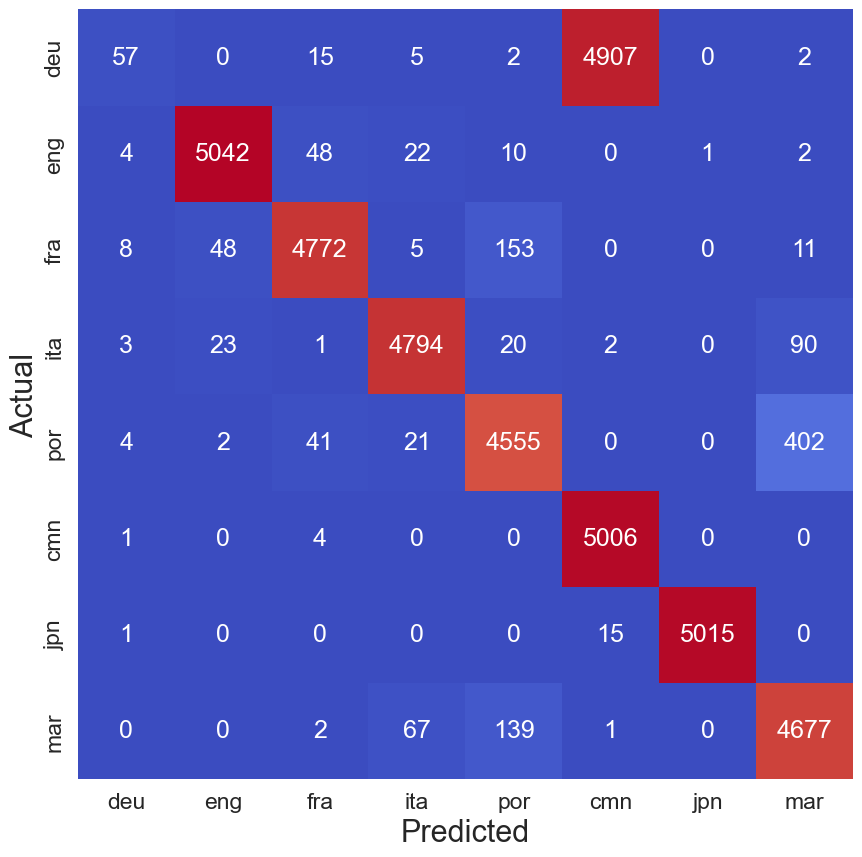

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix

x_test = test_feat.drop('lang',axis=1)
y_test = test_feat['lang']

#Get predictions on test set
labels = model.predict(x_test)
classes_x=np.argmax(labels,axis=1)
predictions = encoder.inverse_transform(classes_x)

accuracy = accuracy_score(y_test,predictions)
print(accuracy)

#Create confusion matrix
lang = ['deu', 'eng', 'fra', 'ita', 'por', 'cmn', 'jpn', 'mar']
conf_matrix = confusion_matrix(y_test,predictions)
conf_matrix_df = pd.DataFrame(conf_matrix,columns=lang,index=lang)

#Plot confusion matrix heatmap
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix_df,cmap='coolwarm',annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

In [67]:
#converting the sentence to csv file
def String_to_csv(String_text_to_predict):
     utf8_string_text_to_predict=String_text_to_predict.encode("utf-8")


     text_file = open("./Predict_Sentence/text_to_predict.txt", "w")
     n = text_file.write(String_text_to_predict)
     text_file.close()

     with open("./Predict_Sentence/text_to_predict.txt", "r") as fin,\
          open("./Predict_Sentence/text_to_predict.csv", "w") as fout:
          zipped = zip(*(line.rstrip().split() for line in fin))
          fout.write(" ".join(chain(*zipped)))

In [68]:
#create feature matrix for the predicting sentence
def csv_to_feature_matrix():
    csv_text_to_predict=pd.read_csv("./Predict_Sentence/text_to_predict.csv", encoding= 'utf-8')
    corpus = csv_text_to_predict   
    X = vectorizer.fit_transform(corpus)

    text_to_predict_feat = pd.DataFrame(data=X.toarray(),columns=feature_names)
    text_to_predict_feat = (text_to_predict_feat - train_min)/(train_max-train_min)
    text_to_predict_feat.to_csv('./Predict_Sentence/text_to_predict_feat.csv')
    text_to_predict_feat = pd.read_csv("./Predict_Sentence/text_to_predict_feat.csv",index_col =0)
    return text_to_predict_feat

In [69]:
#predict language using the trained model
def get_result(text_to_predict_feat):

    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import accuracy_score,confusion_matrix

    x_test = text_to_predict_feat

    #Get predictions on test set
    labels = model.predict(x_test)
    classes_x=np.argmax(labels,axis=1)
    predictions = encoder.inverse_transform(classes_x)

    print(predictions)

In [70]:
def predict_my_sentence(String_text_to_predict):
    String_to_csv(String_text_to_predict)
    get_result(csv_to_feature_matrix())

In [72]:
String_text_to_predict=input("Enter your query :")
predict_my_sentence(String_text_to_predict)

1/1 [==============================] - 0s 28ms/step
['fra']
